In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from google.colab import files

# This creates an upload button in your Colab notebook
uploaded = files.upload()

print(f"File '{'Sales.xslx'}' uploaded successfully.")

Saving Sales.xlsx to Sales (1).xlsx
File 'Sales.xslx' uploaded successfully.


In [9]:
# Get the filename of the uploaded file.
file_name = next(iter(uploaded))

df = pd.read_excel(file_name)
print(df.head())

        Date  Day     Month  Year  Customer_Age       Age_Group  \
0 2013-11-26   26  November  2013            19     Youth (<25)   
1 2015-11-26   26  November  2015            19     Youth (<25)   
2 2014-03-23   23     March  2014            49  Adults (35-64)   
3 2016-03-23   23     March  2016            49  Adults (35-64)   
4 2014-05-15   15       May  2014            47  Adults (35-64)   

  Customer_Gender    Country             State Product_Category Sub_Category  \
0               M     Canada  British Columbia      Accessories   Bike Racks   
1               M     Canada  British Columbia      Accessories   Bike Racks   
2               M  Australia   New South Wales      Accessories   Bike Racks   
3               M  Australia   New South Wales      Accessories   Bike Racks   
4               F  Australia   New South Wales      Accessories   Bike Racks   

               Product  Order_Quantity  Unit_Cost  Unit_Price  Profit  Cost  \
0  Hitch Rack - 4-Bike               

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [11]:
df.isnull().sum()

,0
Date,0
Day,0
Month,0
Year,0
Customer_Age,0
Age_Group,0
Customer_Gender,0
Country,0
State,0
Product_Category,0


In [12]:
# For this dataset, you could use 'State' or 'Customer_Country'
df['City'] = df['State']  # Or however you decide to define 'City'

In [13]:
df['City']

,City
0,British Columbia
1,British Columbia
2,New South Wales
3,New South Wales
4,New South Wales
...,...
113031,England
113032,Queensland
113033,Queensland
113034,Seine (Paris)


Top 10 best-selling products:
Product
Water Bottle - 30 oz.      164086
Patch Kit/8 Patches        157583
Mountain Tire Tube         102792
AWC Logo Cap                67316
Sport-100 Helmet, Red       63663
Road Tire Tube              62296
Fender Set - Mountain       62118
Sport-100 Helmet, Black     62105
Touring Tire Tube           56802
Sport-100 Helmet, Blue      55895
Name: Order_Quantity, dtype: int64


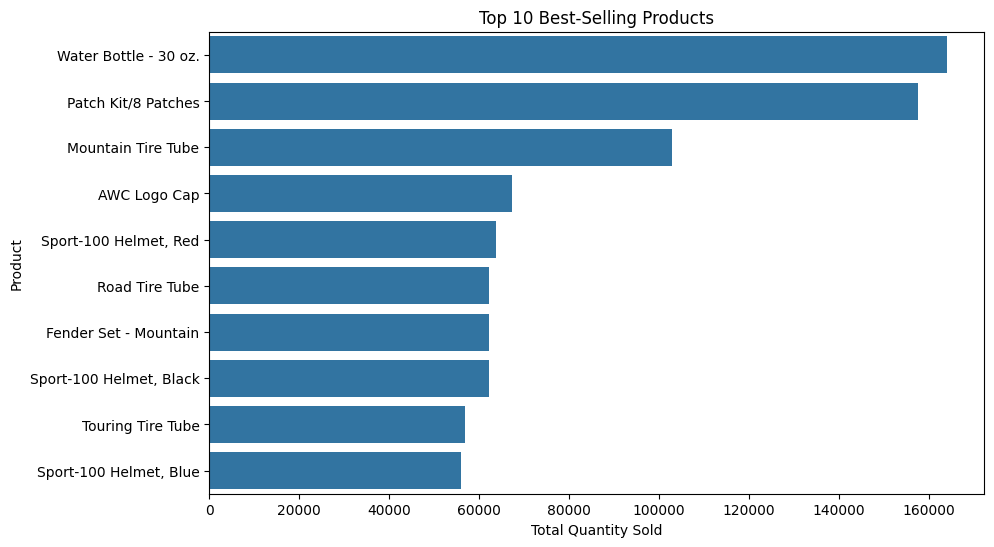

In [14]:
# Best-selling products by quantity
top_products = df.groupby('Product')['Order_Quantity'].sum().sort_values(ascending=False).head(10)
print(f"Top 10 best-selling products:\n{top_products}")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product')
plt.show()


Monthly revenue:
Month
April        7602750
August       5711193
December     9086931
February     6834583
January      7005895
July         5721459
June         9043008
March        7347164
May          8836763
November     6244298
October      5995079
September    5841885
Name: Revenue, dtype: int64


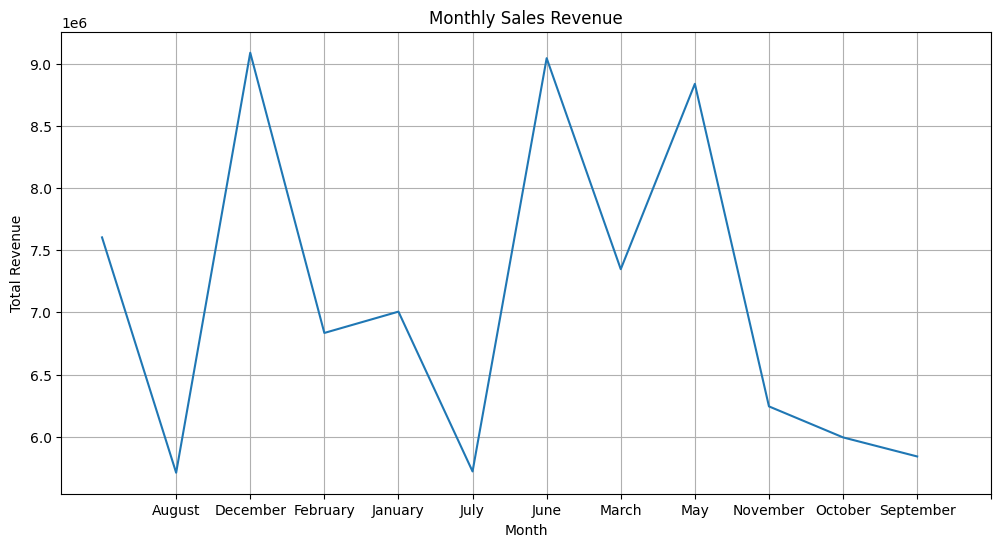

In [15]:
#monthly revenue
monthly_revenue = df.groupby('Month')['Revenue'].sum()
print(f"\nMonthly revenue:\n{monthly_revenue}")
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Sales Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

In [16]:
df.groupby('Product')['Profit'].sum()

,Profit
Product,
AWC Logo Cap,78008
All-Purpose Bike Stand,201064
Bike Wash - Dissolver,116008
"Classic Vest, L",157319
"Classic Vest, M",161740
...,...
"Touring-3000 Yellow, 62",18371
Water Bottle - 30 oz.,417843
"Women's Mountain Shorts, L",286059


In [21]:
# Group by Age_Group and find total revenue
revenue_by_age_group = df.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False)
print("--- Revenue by Age Group ---")
print(revenue_by_age_group)

--- Revenue by Age Group ---
Age_Group
Adults (35-64)          42584153
Young Adults (25-34)    30655614
Youth (<25)             11723199
Seniors (64+)             308042
Name: Revenue, dtype: int64


In [20]:
# Group by Customer_Country and find total revenue
revenue_by_country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
print("\n--- Revenue by Customer Country ---")
print(revenue_by_country)


--- Revenue by Customer Country ---
Country
United States     27975547
Australia         21302059
United Kingdom    10646196
Germany            8978596
France             8432872
Canada             7935738
Name: Revenue, dtype: int64


In [22]:
# Group by 'Product' and sum both 'Revenue' and 'Cost'
product_profit_analysis = df.groupby('Product')[['Revenue', 'Cost']].sum()

# Calculate the 'Profit' for each product
product_profit_analysis['Profit'] = product_profit_analysis['Revenue'] - product_profit_analysis['Cost']

# Sort the results to find the most and least profitable products
product_profit_analysis = product_profit_analysis.sort_values(by='Profit', ascending=False)
print("\n--- Product Profitability ---")
print(product_profit_analysis)


--- Product Profitability ---
                         Revenue     Cost   Profit
Product                                           
Mountain-200 Black, 38   3366248  2055784  1310464
Road-150 Red, 62         3829416  2585661  1243755
Mountain-200 Silver, 42  3081078  1849626  1231452
Sport-100 Helmet, Red    2019021   827619  1191402
Mountain-200 Silver, 38  3035442  1869882  1165560
...                          ...      ...      ...
Touring-3000 Yellow, 62    56634    38263    18371
Touring-3000 Blue, 50      45694    32270    13424
Mountain-500 Silver, 48    25794    16016     9778
Road-650 Red, 52           34669    25324     9345
Mountain-500 Black, 52     19287    11800     7487

[130 rows x 3 columns]
